## EMPLOYEE DATABASE: A MYSTERY IN TWO PARTS (BONUS)
1. Import the SQL database into Pandas.
2. Create a histogram to visualize the most common salary ranges for employees.
3. Create a bar chart of average salary by title.

In [1]:
# --- dependencies and setup ---
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as sts

In [4]:
# **************************************************************************************
# Bonus Q1. Import the SQL database into Pandas.
# **************************************************************************************

# --- get database url from environment variable ---
from decouple import config
db_url = config('DATABASE_URL')

# --- SQL Alchemy connection to Postgres DB ---
from sqlalchemy import create_engine
engine = create_engine(db_url)
connection = engine.connect()


In [4]:
# --- read data from SQL tables and save into DataFrames ---
salaries_df = pd.read_sql_table("salaries", con=connection)
titles_df = pd.read_sql_table("titles", con=connection)
employees_df = pd.read_sql_table("employees", con=connection)

In [5]:
# --- check salary dataframe ----
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
# --- check titles dataframe ----
titles_df

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [7]:
# --- check employees dataframe ----
employees_df.head()

# --- rename emp_title_id field for merging with titles dataframe later ---
employees_df.rename(columns={"emp_title_id":"title_id"}, inplace=True)
employees_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


-----------------------------------------------
The average salary is $52970.73
The median salary is $48681.0
The mode salary is $40000
The variance is 204531605.31
The standard deviation is 14301.45
-----------------------------------------------


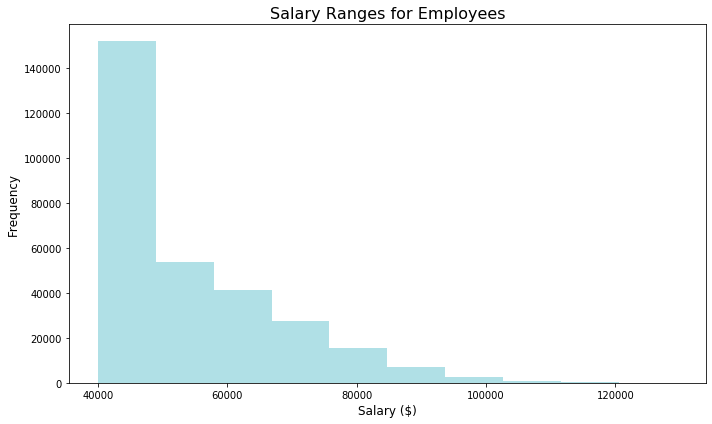

In [8]:
# **************************************************************************************
# Bonus Q2. Create a histogram to visualize the most common salary ranges for employees.
# **************************************************************************************

# --- retrieve salary data ---
salaries = salaries_df['salary']

# --- calculate measures of central tendency ---
print("-----------------------------------------------")
mean_sal = np.mean(salaries)
print(f"The average salary is ${round(mean_sal, 2)}")

median_sal = np.median(salaries)
print(f"The median salary is ${round(median_sal, 2)}")

mode_sal = sts.mode(salaries)
print(f"The mode salary is ${mode_sal[0][0]}")

# --- calculate the variance and standard deviation ---
var_sal = np.var(salaries, ddof = 0)
print(f"The variance is {round(var_sal, 2)}")

std_sal = np.std(salaries, ddof = 0)
print(f"The standard deviation is {round(std_sal, 2)}")
print("-----------------------------------------------")

# --- plot histogram using pyplot ---
plt.figure(figsize=(10,6))
plt.hist(salaries, color='powderblue')

# --- set titles, labels ---
plt.xlabel('Salary ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Salary Ranges for Employees', fontsize=16)

plt.tight_layout()
plt.savefig('images/histogram.png')
plt.show()

In [9]:
# ***********************************************************
# Bonus Q3. Create a bar chart of average salary by title
# ***********************************************************

# --- merge employees, salaries and titles dataframes to get the relevant data to plot (title, salary) ---
emp_salaries_df = pd.merge(employees_df, salaries_df, on="emp_no")
title_salaries_df = pd.merge(emp_salaries_df, titles_df, on="title_id")

# --- cleaning the table: remove unnecessary rows and only keep those required for plotting ---
title_salaries_df.drop(["emp_no", "title_id", "birth_date", "first_name", "last_name", "sex", "hire_date"], 
                        axis=1, inplace=True)

# --- create a group by object on title with average salaries ---
average_salaries = title_salaries_df.groupby("title").mean().round(2)

# --- display formatted average salary dataframe ---
average_salaries.rename(columns={"salary":"avg salary ($)"}, inplace=True)
average_salaries.style.format("${:,.2f}")

,avg salary ($)
title,
Assistant Engineer,"$48,564.43"
Engineer,"$48,535.34"
Manager,"$51,531.04"
Senior Engineer,"$48,506.80"
Senior Staff,"$58,550.17"
Staff,"$58,465.38"
Technique Leader,"$48,582.90"


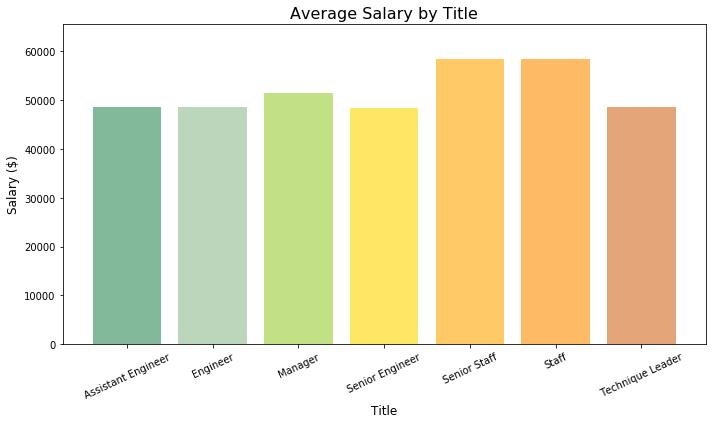

In [11]:
# PLOTTING

# --- set x-axis, y-axis and x-ticklabels ---
x_values = average_salaries.index
y_values = average_salaries["avg salary ($)"]
xticks = np.arange(len(x_values))

# --- colors for each bar ---
colors=["seagreen", "darkseagreen", "yellowgreen", "gold", "orange", "darkorange", "chocolate"]

# --- plot the data using pyplot ---
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color=colors, alpha=0.6, align="center")

# --- x-tick locations ---
tick_locations = [value for value in x_values]
plt.xticks(tick_locations, x_values, rotation=25)

# --- titles, labels and limits ---
plt.xlabel("Title", fontsize=12)
plt.ylabel("Salary ($)", fontsize=12)
plt.title("Average Salary by Title", fontsize=16)

plt.xlim(-0.75, len(x_values)-0.25)
plt.ylim(0, max(y_values)+7000)

plt.tight_layout()
plt.savefig("images/avg_sal_title.png")
plt.show()

